<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Info" data-toc-modified-id="Info-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Info</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data preprocessing</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Предсказание-медианами-и-средними" data-toc-modified-id="Предсказание-медианами-и-средними-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Предсказание медианами и средними</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#Random-Forest-Regression" data-toc-modified-id="Random-Forest-Regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Random Forest Regression</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#Cat-Boost-Regression" data-toc-modified-id="Cat-Boost-Regression-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Cat Boost Regression</a></span></li><li><span><a href="#LGBM-Regression" data-toc-modified-id="LGBM-Regression-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>LGBM Regression</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Linear-Model" data-toc-modified-id="Linear-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Linear Model</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#Cat-Boost-Regression" data-toc-modified-id="Cat-Boost-Regression-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Cat Boost Regression</a></span></li><li><span><a href="#LGBM-Regression" data-toc-modified-id="LGBM-Regression-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>LGBM Regression</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.model_selection import train_test_split,TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
import lightgbm as lgb
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

### Read data

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv', index_col=[0], parse_dates=[0])

### Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [6]:
df.tail()

,num_orders
datetime,
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27
2018-08-31 23:40:00,39
2018-08-31 23:50:00,53


In [7]:
df.isna().sum().sum()

0

In [8]:
df.duplicated().sum()

26415

In [9]:
df.index.is_monotonic

True

###  Data preprocessing

Изменим интервал на 1 час

In [10]:
df = df.resample('1H').sum()
df_analyzis = df.copy()

## Анализ

In [11]:
df_analyzis['mean'] = df_analyzis['num_orders'].rolling(24).mean()
df_analyzis['std'] = df_analyzis['num_orders'].rolling(24).std()

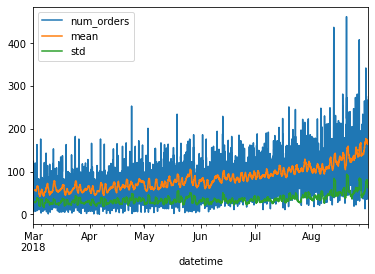

In [12]:
df_analyzis.plot()
plt.show()

Посмотрим на тренды и сезонность данных

In [13]:
def trends(data):
    decomposed = seasonal_decompose(data)
    plt.figure(figsize=(12, 8))
    plt.subplot(311)
    decomposed.trend.plot(ax=plt.gca())
    plt.title('Trend')
    plt.subplot(312)
    decomposed.seasonal.plot(ax=plt.gca())
    plt.title('Seasonality')
    plt.subplot(313)
    decomposed.resid.plot(ax=plt.gca())
    plt.title('Residuals')
    plt.tight_layout()

За все время наблюдения:

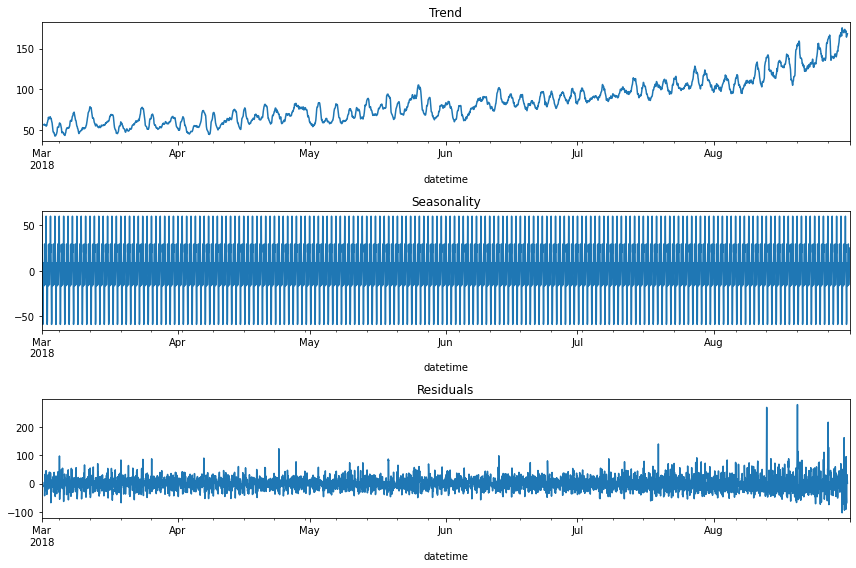

In [14]:
trends(df_analyzis['num_orders'])

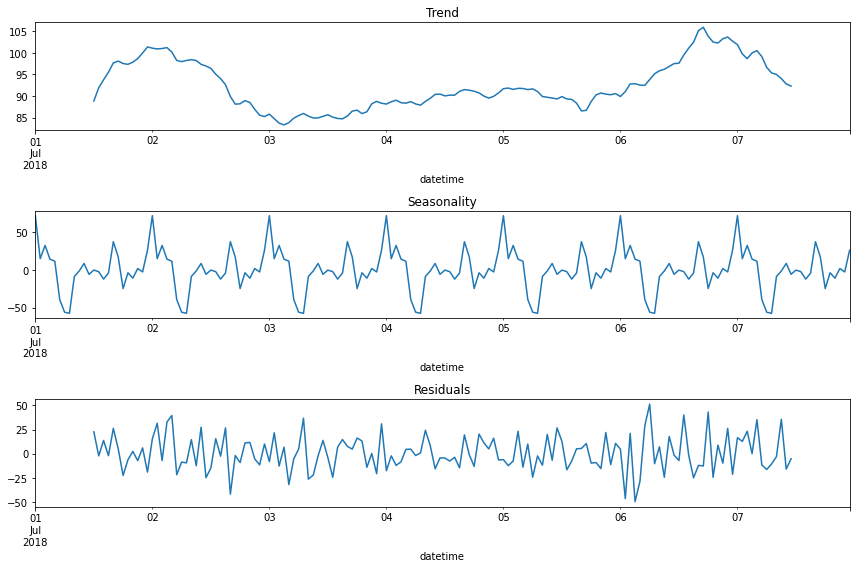

In [15]:
trends(df_analyzis['2018-07-01 00:00:00':'2018-07-07 23:59:50']['num_orders'])

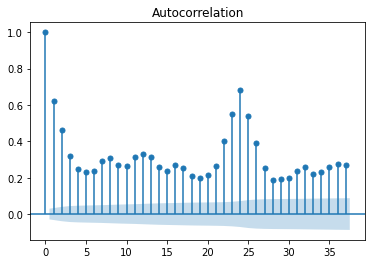

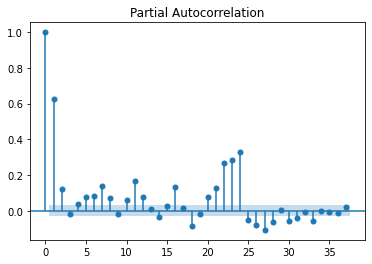

In [16]:
plot_acf(df_analyzis['num_orders'])
plot_pacf(df_analyzis['num_orders'])
plt.show()

In [17]:
result = adfuller(df_analyzis['num_orders'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.068924
p-value: 0.028940
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Значение p-value <0.05,значение статистики меньше чем критическое значение при 5%, поэтому отклоняем нулевую гипотезу о том, что ряд нестационарен с уровнем значимости менее 5%. Помимо этого наблюдаются тренды повышения заказов такси в выходные дни и в понедельники. Так же наблюдается сезонность по времени суток

## Обучение

In [18]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [19]:
def make_features(data, max_lag, rolling_mean_size):
    df= data.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek

    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()
    return df

In [20]:
data = make_features(df, 1,24)

In [21]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

features_train = train.drop('num_orders',axis = 1)
features_test = test.drop('num_orders',axis = 1)
target_train = train['num_orders']
target_test =  test['num_orders']

In [22]:
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-02 00:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


In [23]:
def predict(model,features_train=features_train, target_train=target_train,features_test=features_test, target_test=target_test):
    model.fit(features_train, target_train)
    pred_train=model.predict(features_train)
    pred_test  = model.predict(features_test)
    rmse_train = rmse(target_train, pred_train)
    rmse_test = rmse(target_test, pred_test)
    print(f'{model} regression rmse(train):',rmse_train)
    print(f'{model} regression rmse(test):',rmse_test)
    plt.figure(figsize=(16, 6))
    plt.plot(features_test.index, target_test, label='Actual values')
    plt.plot(features_test.index, pred_test, label='Predicted values')
    plt.legend()
    plt.show()

In [24]:
test_size = 0.1
n_splits = (1//test_size)-1
n_splits
tscv=TimeSeriesSplit(n_splits=int(n_splits))
# for train_index, test_index in tscv.split( np.array(data)):
#     print(train_index, test_index)
def gridsearch(hyperparams,model,features_train=features_train, target_train=target_train,scoring=rmse_scorer):
    model = model
    # clf = GridSearchCV(model, hyperparams, scoring=scoring)
    clf = GridSearchCV(model, param_grid=hyperparams, scoring='neg_mean_squared_error', n_jobs=-1, cv=tscv, verbose=1)
    clf.fit(features_train, target_train)
    print(clf.best_params_)

### Предсказание медианами и средними

In [25]:
predictions_median = np.ones(target_test.shape) * target_train.median()
predictions_mean = np.ones(target_test.shape)* target_train.mean()

print("Predict with median(rmse):", rmse(target_test, predictions_median))
print("Predict with mean(rmse):", rmse(target_test, predictions_mean))


Predict with median(rmse): 87.15277582981295
Predict with mean(rmse): 84.6499381993622


In [26]:
linear_model = LinearRegression()

### DecisionTreeRegressor


In [27]:
%%time
hyperparams = { 'max_depth':[x for x in range(2, 16)],
                'random_state':[12345],
                'min_samples_split': np.arange(2,20,2),
                'min_samples_leaf':range(1,5)}

gridsearch(hyperparams,DecisionTreeRegressor(),features_train=features_train, target_train=target_train,scoring=rmse_scorer)

Fitting 8 folds for each of 504 candidates, totalling 4032 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    6.0s


{'max_depth': 13, 'min_samples_leaf': 4, 'min_samples_split': 18, 'random_state': 12345}
Wall time: 10 s


[Parallel(n_jobs=-1)]: Done 4032 out of 4032 | elapsed:    9.9s finished


### Random Forest Regression

In [28]:
%%time
hyperparams = { 'max_depth':[x for x in range(2, 5)],
                'random_state':[12345],
                'min_samples_split': np.arange(2,5,1),
                'min_samples_leaf':range(1,5)}
gridsearch(hyperparams,RandomForestRegressor(),features_train=features_train, target_train=target_train,scoring=rmse_scorer)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 36 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   13.1s finished


{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 12345}
Wall time: 13.5 s


### Ridge Regression

In [29]:
%%time
hyperparams = {'alpha': [1,0.1,0.01,0.001,0.0001,0],
               'solver' :['auto', 'svd', 'cholesky']}
gridsearch(hyperparams,Ridge(),features_train=features_train, target_train=target_train,scoring=rmse_scorer)

Fitting 8 folds for each of 18 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'alpha': 1, 'solver': 'svd'}
Wall time: 324 ms


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    0.2s finished


### Cat Boost Regression

In [30]:
%%time
hyperparams = {'depth': [3, 10],
               'loss_function': ['RMSE'],
               'learning_rate':np.arange(0.1,1,0.2),
               'random_seed': [12345]
               }
gridsearch(hyperparams,CatBoostRegressor(iterations=200,logging_level = 'Silent'),features_train=features_train, target_train=target_train,scoring=rmse_scorer)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   34.4s finished


{'depth': 10, 'learning_rate': 0.1, 'loss_function': 'RMSE', 'random_seed': 12345}
Wall time: 36.9 s


### LGBM Regression

In [31]:
%%time
hyperparams = {'max_depth': [5, 10],
               'n_estimators': [50,150,100,200],
               'random_state': [12345]
               }
gridsearch(hyperparams,lgb.LGBMRegressor(),features_train=features_train, target_train=target_train,scoring=rmse_scorer)

Fitting 8 folds for each of 8 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s


{'max_depth': 5, 'n_estimators': 100, 'random_state': 12345}
Wall time: 1.89 s


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.7s finished


## Тестирование

### Linear Model

LinearRegression() regression rmse(train): 30.90708535540955
LinearRegression() regression rmse(test): 51.194080671652486


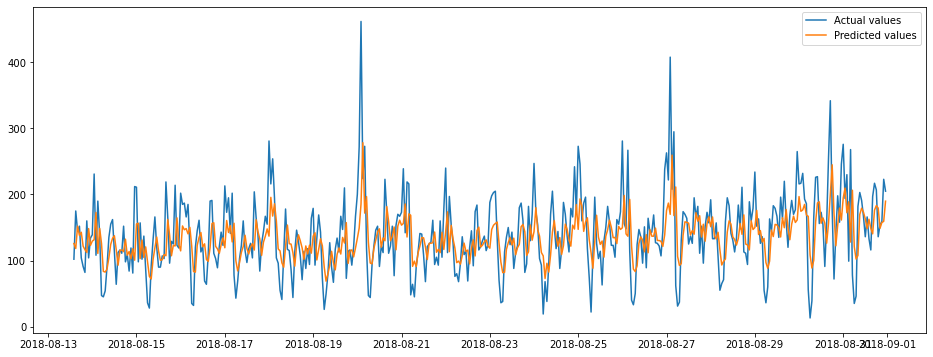

Wall time: 284 ms


In [32]:
%%time
predict(linear_model,features_train=features_train, target_train=target_train,features_test=features_test, target_test=target_test)

### DecisionTreeRegressor

DecisionTreeRegressor(max_depth=13, min_samples_leaf=4, min_samples_split=18,
                      random_state=12345) regression rmse(train): 18.604227471933914
DecisionTreeRegressor(max_depth=13, min_samples_leaf=4, min_samples_split=18,
                      random_state=12345) regression rmse(test): 50.78107509911944


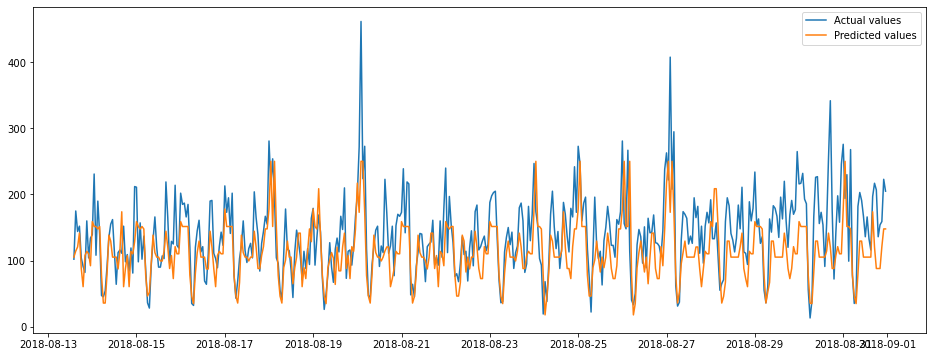

Wall time: 233 ms


In [33]:
%%time
tree_model = DecisionTreeRegressor(max_depth = 13,
                                   min_samples_leaf=4,
                                   min_samples_split=18,
                                   random_state=12345)
predict(tree_model,features_train=features_train, target_train=target_train,features_test=features_test, target_test=target_test)

### RandomForestRegressor

RandomForestRegressor(max_depth=4, min_samples_leaf=3, random_state=12345) regression rmse(train): 25.472226755999795
RandomForestRegressor(max_depth=4, min_samples_leaf=3, random_state=12345) regression rmse(test): 56.76843152845206


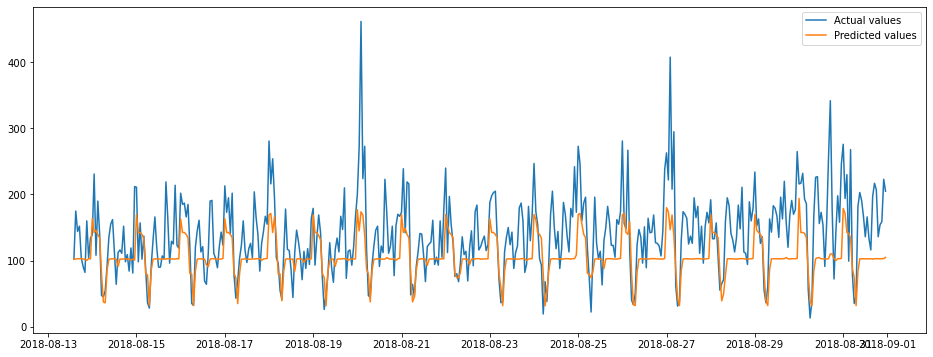

Wall time: 491 ms


In [34]:
%%time
forest_model = RandomForestRegressor(max_depth = 4,
                                     min_samples_leaf = 3,
                                     min_samples_split = 2,
                                     random_state = 12345)
predict(forest_model,features_train=features_train, target_train=target_train,features_test=features_test, target_test=target_test)

### Ridge Regression

Ridge(alpha=1, solver='svd') regression rmse(train): 30.907085355412203
Ridge(alpha=1, solver='svd') regression rmse(test): 51.19408180990222


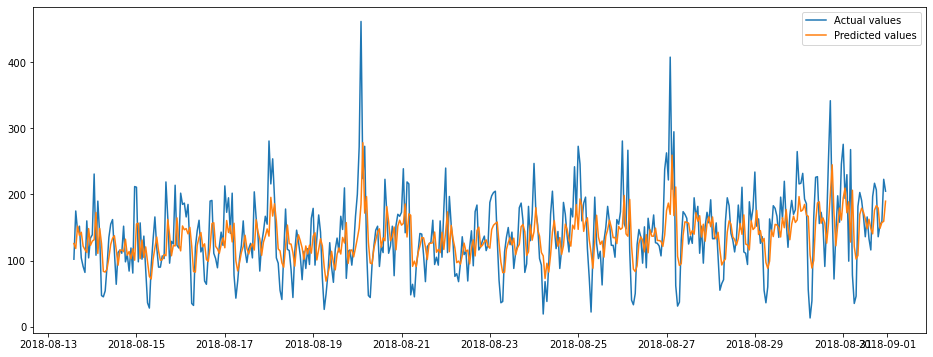

Wall time: 304 ms


In [35]:
%%time
ridge_model = Ridge(alpha = 1,fit_intercept = True,solver = 'svd')
predict(ridge_model,features_train=features_train, target_train=target_train,features_test=features_test, target_test=target_test)

### Cat Boost Regression

<catboost.core.CatBoostRegressor object at 0x000002928AF472E0> regression rmse(train): 8.077590060925617
<catboost.core.CatBoostRegressor object at 0x000002928AF472E0> regression rmse(test): 43.482158292920104


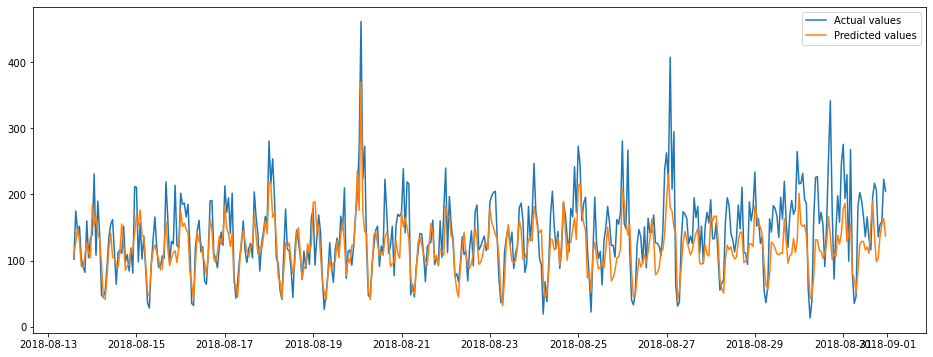

Wall time: 11.7 s


In [36]:
%%time
cat_model = CatBoostRegressor(depth = 10, learning_rate = 0.1, loss_function= 'RMSE', random_seed= 12345,logging_level = 'Silent')
predict(cat_model,features_train=features_train, target_train=target_train,features_test=features_test, target_test=target_test)

### LGBM Regression

LGBMRegressor(max_depth=5, random_state=1234) regression rmse(train): 18.759778736557834
LGBMRegressor(max_depth=5, random_state=1234) regression rmse(test): 43.13803913045753


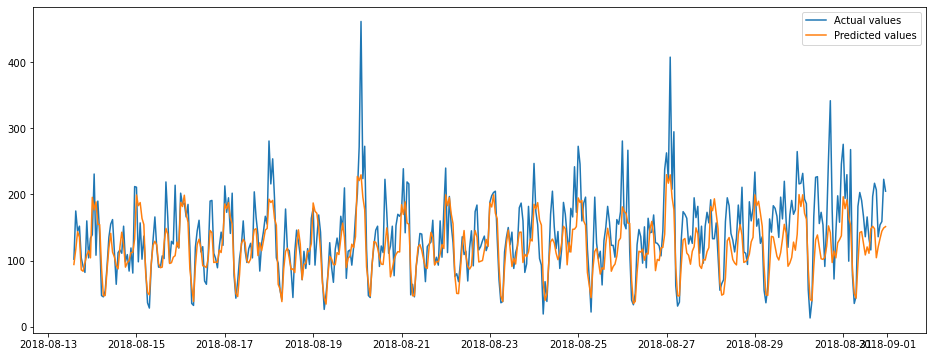

Wall time: 356 ms


In [37]:
%%time
lgbm_model = lgb.LGBMRegressor(max_depth = 5,n_estimators=100,random_state=1234)
predict(lgbm_model,features_train=features_train, target_train=target_train,features_test=features_test, target_test=target_test)

### Выводы

| model      | Linear Regression | Decision Tree Regressoion | Random Forest Regression | Ridge Regression | Cat Boost Regression | LGBM Regression |
|------------|-------------------|---------------------------|--------------------------|------------------|----------------------|-----------------|
| rmse test  | 51.19          | 50.78                 | 56.76                 | 51.19        | 43.48           | 43.13       |
| CPU time | 336 ms            | 256 ms                    | 612 ms                   | 294 ms           | 11.8 s             | 332 ms        |

Модели, которые показали rmse < 48: **Cat Boost и LGBM.** Наилучшей моделью с **rmse = 43.13** и временем прогнозирования **CPU Time = 332 ms** являтеся <span style="color: green"> LGBM Regressor</span>.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48